**SCATTER PLOT**

In [25]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [26]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [27]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

*Example*

In [28]:
# data = {
#     'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
#     'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
#     'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
# }

# df = pd.DataFrame(data)

In [29]:
# df.plot(kind = 'scatter', x = 'skill_count', y = 'skill_pay')

-------------------------------------------------------------------------------------------------------

In [30]:
df = df[df['job_title_short'] == 'Data Analyst']

In [31]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)

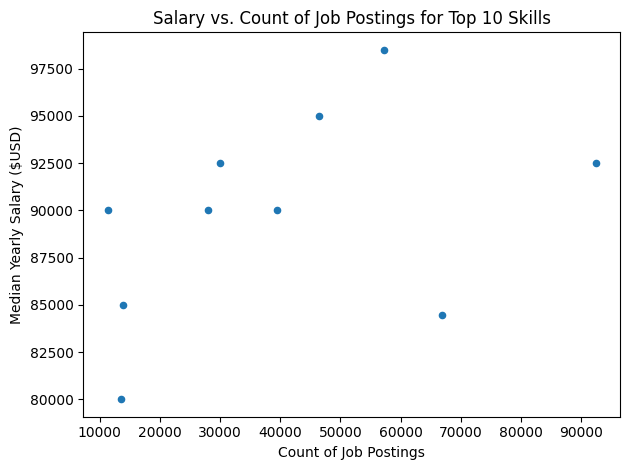

In [32]:
skills_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()


Unfortunately, Matplotlib doesn't make this easy to actually working with annotating this. Seaborn library makes it a lot easier to do

Adding notations to this, using the text function of the Matplotlib library..........

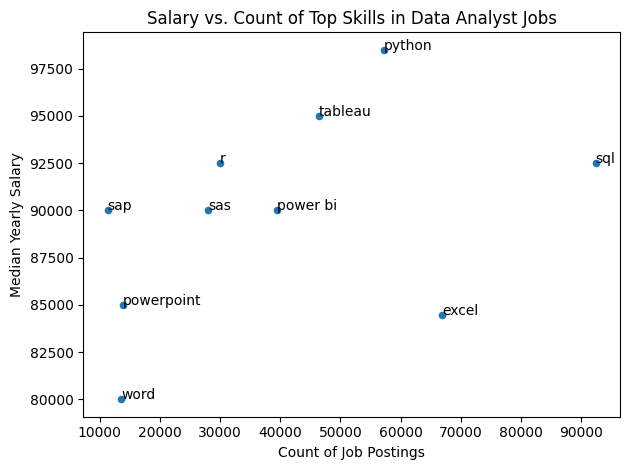

In [34]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()
